<a href="https://colab.research.google.com/github/Zahidlaguna/loantree/blob/main/LoanDecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
import xgboost as xgb

In [21]:
loans = pd.read_csv('/loan-train.csv')
updatedloans = loans.fillna(loans.mean())
updatedloans.head()

<ipython-input-21-4cb1f00b1d76>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  updatedloans = loans.fillna(loans.mean())


Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0  146.412162             360.0   
1             4583             1508.0  128.000000             360.0   
2             3000                0.0   66.000000             360.0   
3             2583             2358.0  120.000000             360.0   
4             6000                0.0  141.000000             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [22]:
print(updatedloans.describe())
print(updatedloans.info())
print(updatedloans.shape)

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  614.000000        614.000000   
mean       5403.459283        1621.245798  146.412162        342.000000   
std        6109.041673        2926.248369   84.037468         64.372489   
min         150.000000           0.000000    9.000000         12.000000   
25%        2877.500000           0.000000  100.250000        360.000000   
50%        3812.500000        1188.500000  129.000000        360.000000   
75%        5795.000000        2297.250000  164.750000        360.000000   
max       81000.000000       41667.000000  700.000000        480.000000   

       Credit_History  
count      614.000000  
mean         0.842199  
std          0.349681  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 # 

In [23]:
features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
X = updatedloans[features]
y = updatedloans['Loan_Status']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [25]:
classify = DecisionTreeClassifier(criterion="entropy")
classify.fit(X_train, y_train)
y_pred = classify.predict(X_test)

In [26]:
print('The Accuracy of this model:', metrics.accuracy_score(y_test, y_pred))

The Accuracy of this model: 0.6774193548387096


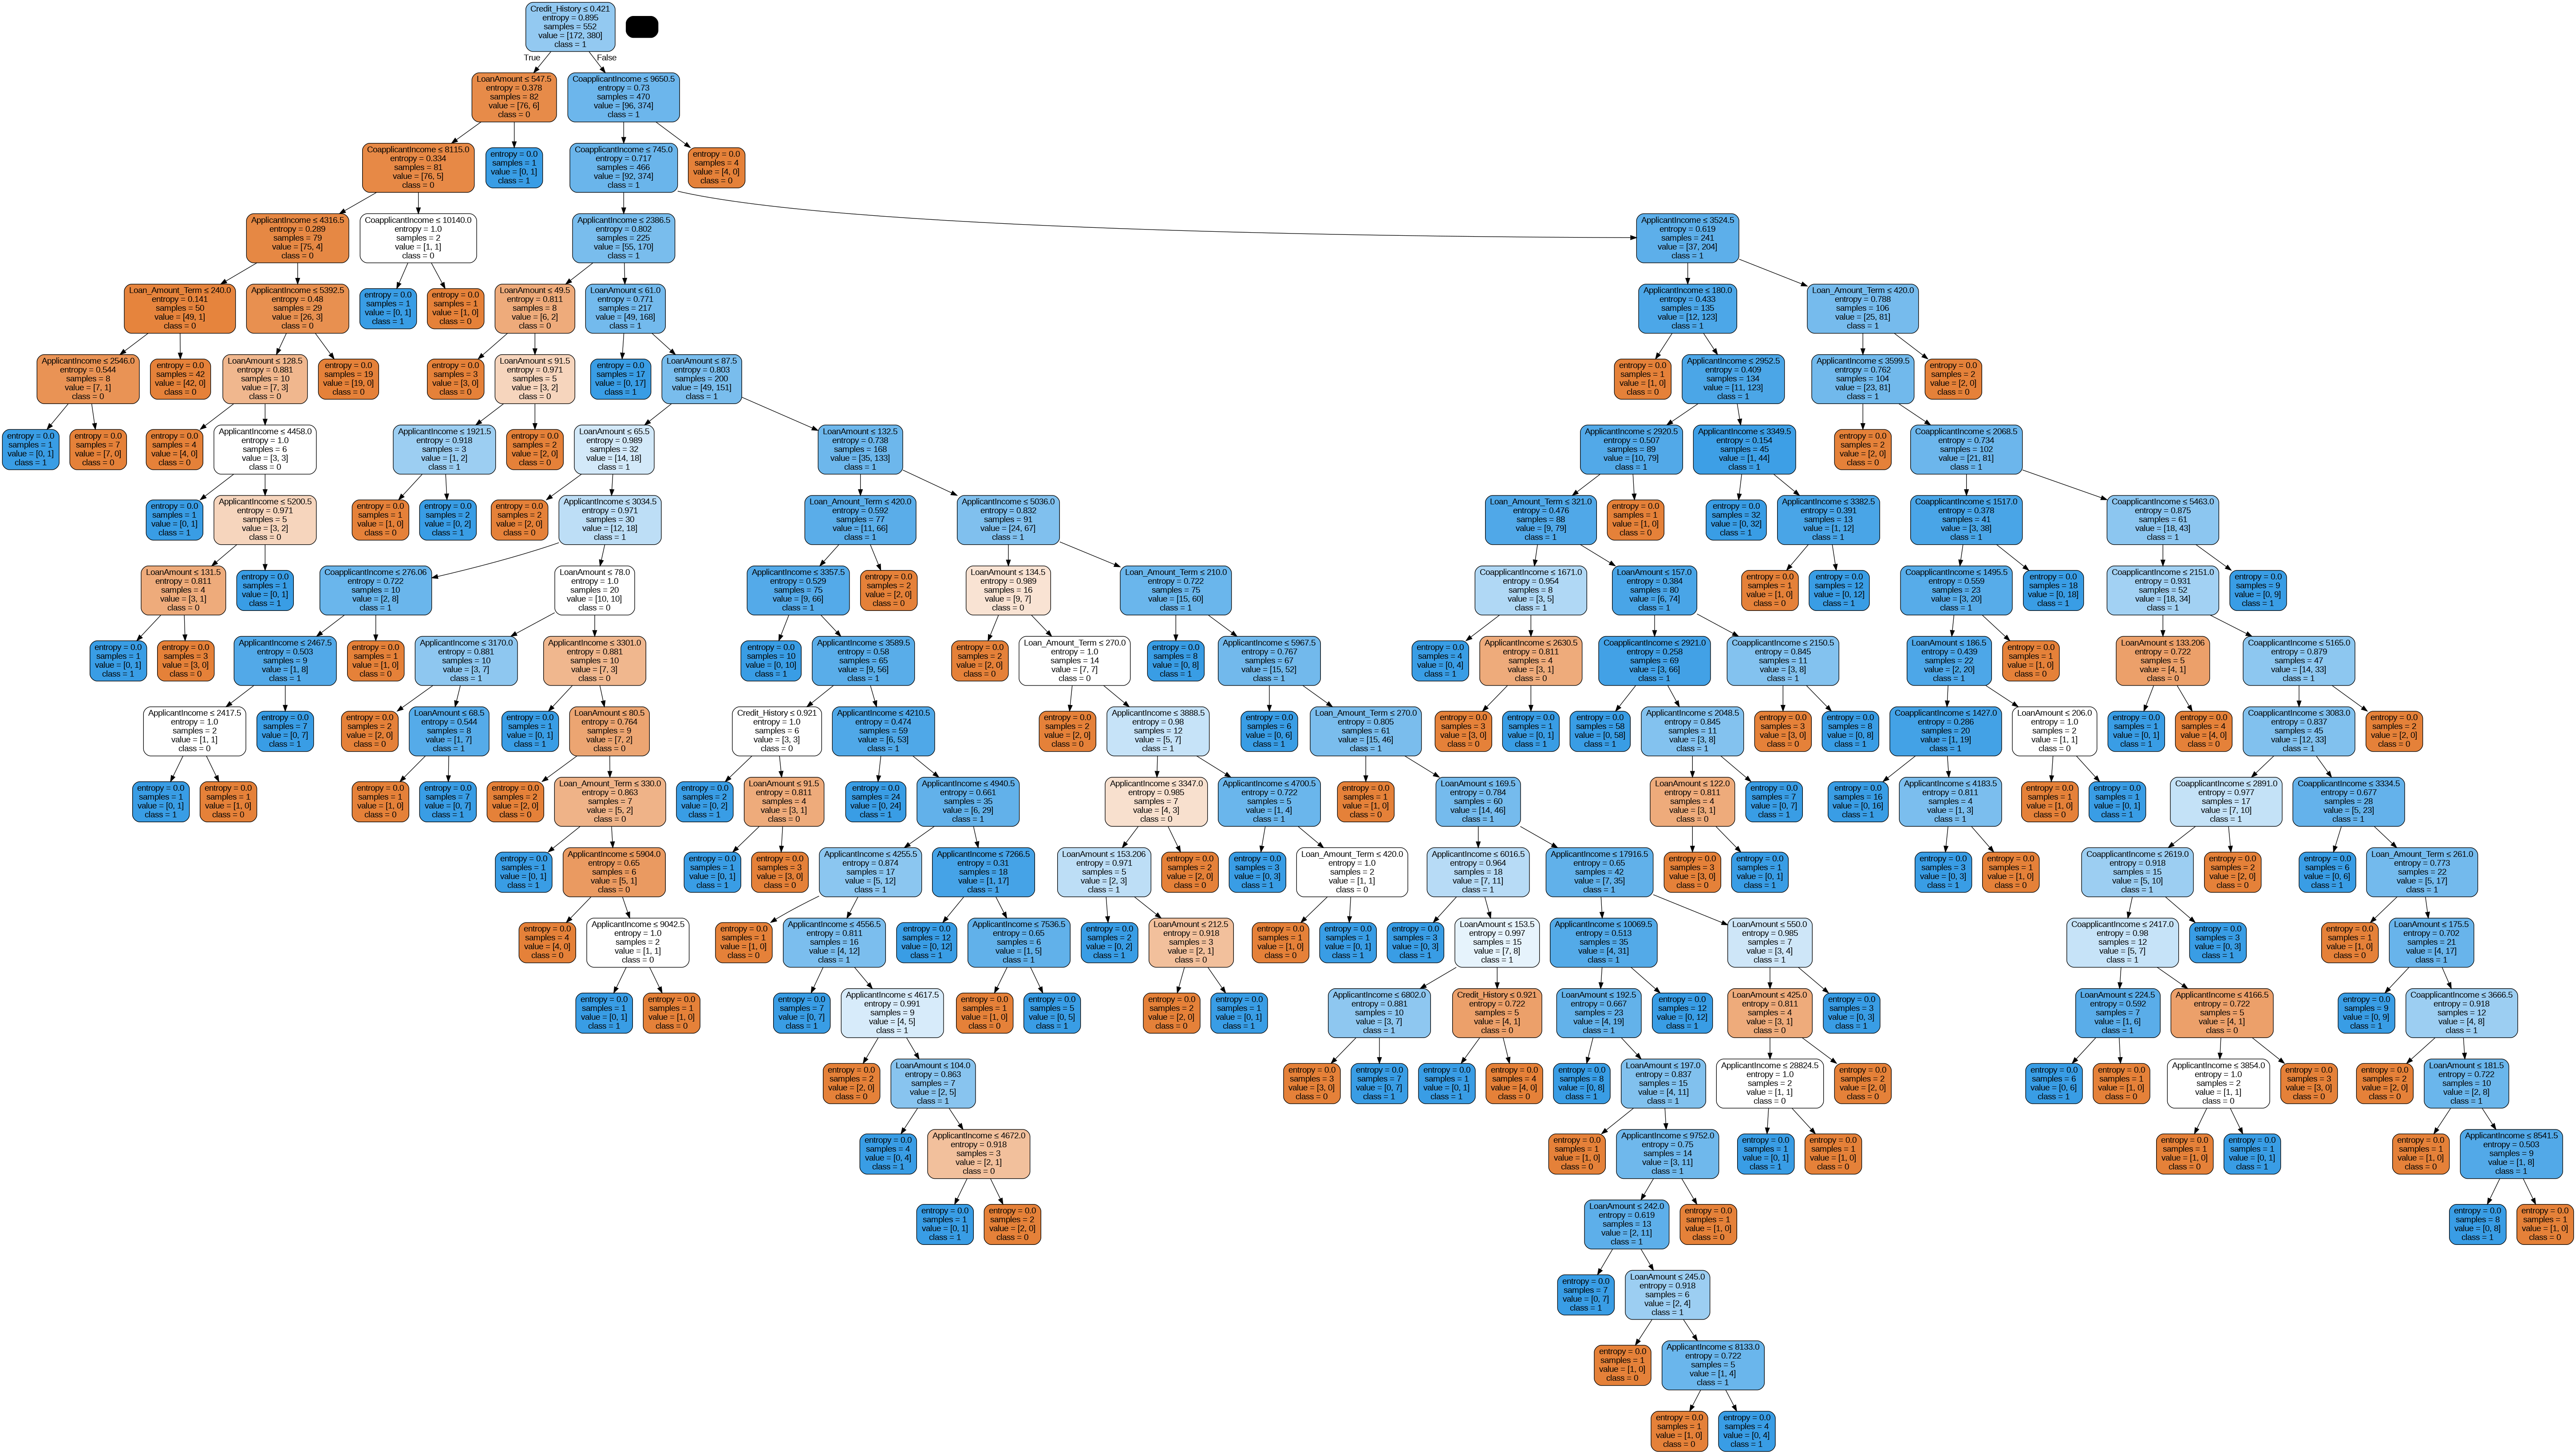

In [27]:
data = StringIO()
export_graphviz(classify, out_file = data, filled = True, rounded = True, special_characters = True, feature_names = features, class_names = ['0', '1'])
graph = pydotplus.graph_from_dot_data(data.getvalue())
graph.write_png('tree.png')
Image(graph.create_png())

In [31]:
xgb_model = xgb.XGBClassifier()
y_train = y_train.map({'N':0, 'Y':1})
y_test = y_test.map({'N':0, 'Y':1})
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

In [32]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy Score is: %f" % accuracy)

Accuracy Score is: 0.741935


In [33]:
xgb_model = xgb.XGBClassifier(learning_rate=0.1, n_estimators=100)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

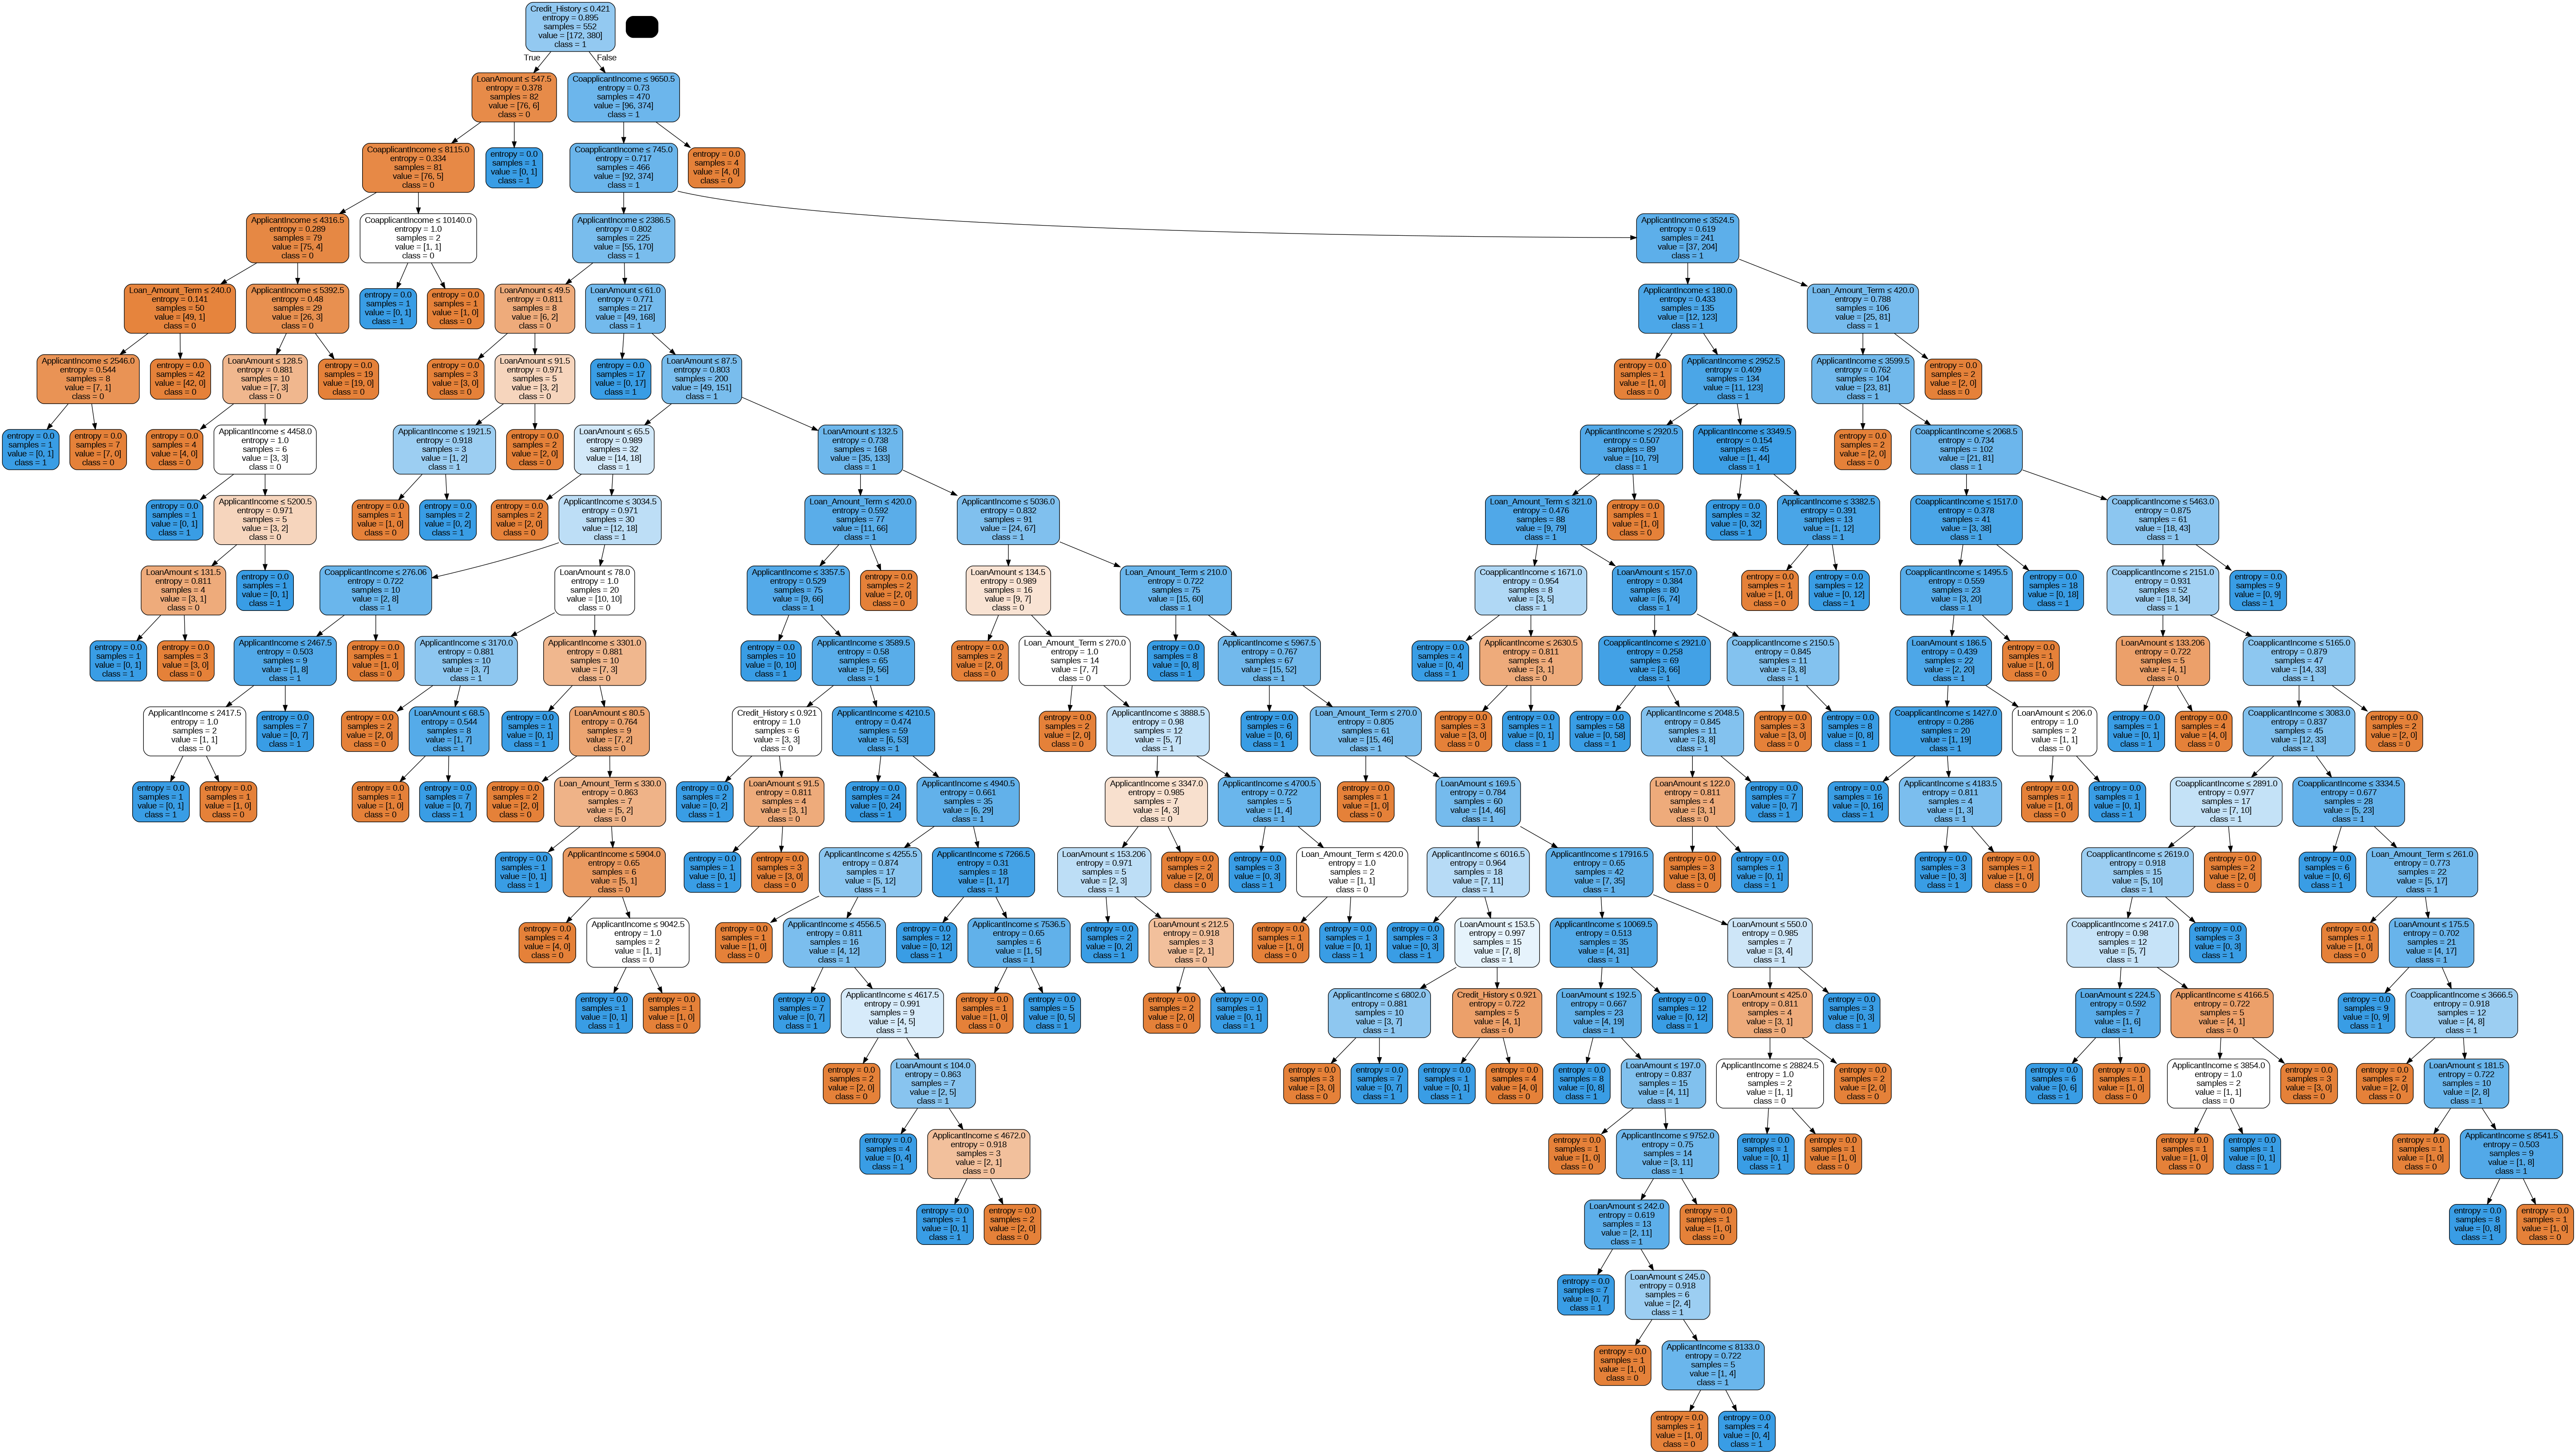

In [34]:
data = StringIO()
export_graphviz(classify, out_file = data, filled = True, rounded = True, special_characters = True, feature_names = features, class_names = ['0', '1'])
graph = pydotplus.graph_from_dot_data(data.getvalue())
graph.write_png('tree.png')
Image(graph.create_png())